In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
zoo_data=pd.read_csv("Zoo.csv")
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo_data.shape

(101, 18)

In [4]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [5]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
zoo_data['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [7]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()



In [8]:
zoo_data['animal name']=lab_enc.fit_transform(zoo_data['animal name'])

In [9]:
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [10]:
X=zoo_data.drop(labels=['catsize','animal name'],axis=1)
y=zoo_data[['catsize']]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
print("For ",5," Neighbors Accuracy Score :",accuracy_score(y_train,y_pred_train))

For  5  Neighbors Accuracy Score : 0.8


In [18]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
print("For ",7," neighbors Accuracy Score :",accuracy_score(y_test,y_pred_test))

For  7  neighbors Accuracy Score : 0.9047619047619048


In [20]:
a=[]
for i in range(1,31,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    print("For ",i," Neighbors Accuracy Score :",accuracy_score(y_train,y_pred_train))
    a.append(accuracy_score(y_train,y_pred_train))

For  1  Neighbors Accuracy Score : 0.8375
For  3  Neighbors Accuracy Score : 0.85
For  5  Neighbors Accuracy Score : 0.8
For  7  Neighbors Accuracy Score : 0.7625
For  9  Neighbors Accuracy Score : 0.75
For  11  Neighbors Accuracy Score : 0.725
For  13  Neighbors Accuracy Score : 0.7375
For  15  Neighbors Accuracy Score : 0.7375
For  17  Neighbors Accuracy Score : 0.725
For  19  Neighbors Accuracy Score : 0.7375
For  21  Neighbors Accuracy Score : 0.7375
For  23  Neighbors Accuracy Score : 0.7375
For  25  Neighbors Accuracy Score : 0.7375
For  27  Neighbors Accuracy Score : 0.7375
For  29  Neighbors Accuracy Score : 0.7375


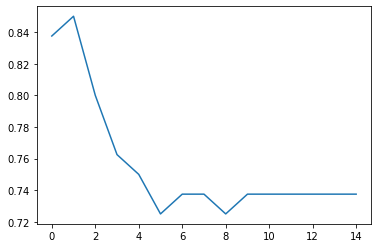

In [22]:
plt.plot(a)

In [21]:
c=[]
for i in range(1,31,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    print("For ",i," neighbors Accuracy Score :",accuracy_score(y_test,y_pred_test))
    c.append(accuracy_score(y_test,y_pred_test))

For  1  neighbors Accuracy Score : 0.6190476190476191
For  3  neighbors Accuracy Score : 0.7142857142857143
For  5  neighbors Accuracy Score : 0.7619047619047619
For  7  neighbors Accuracy Score : 0.9047619047619048
For  9  neighbors Accuracy Score : 0.9047619047619048
For  11  neighbors Accuracy Score : 0.8571428571428571
For  13  neighbors Accuracy Score : 0.8571428571428571
For  15  neighbors Accuracy Score : 0.8571428571428571
For  17  neighbors Accuracy Score : 0.8571428571428571
For  19  neighbors Accuracy Score : 0.8571428571428571
For  21  neighbors Accuracy Score : 0.8571428571428571
For  23  neighbors Accuracy Score : 0.8571428571428571
For  25  neighbors Accuracy Score : 0.8571428571428571
For  27  neighbors Accuracy Score : 0.8571428571428571
For  29  neighbors Accuracy Score : 0.8571428571428571


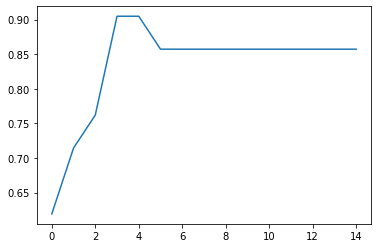

In [23]:
 plt.plot(c)

In [26]:
from sklearn.model_selection import cross_val_score

In [34]:
cv_score=[]
for i in range(1,31,2):
    
    kneig=KNeighborsClassifier(n_neighbors=i)
    cross_score=cross_val_score(estimator=kneig,X=X,y=y,cv=5)
    cv_score.append(cross_score.mean())

In [35]:
cv_score

[0.7114285714285714,
 0.7919047619047619,
 0.730952380952381,
 0.760952380952381,
 0.7709523809523808,
 0.7809523809523811,
 0.7709523809523808,
 0.7609523809523809,
 0.7609523809523809,
 0.7609523809523809,
 0.7709523809523808,
 0.7709523809523808,
 0.7609523809523809,
 0.780952380952381,
 0.770952380952381]

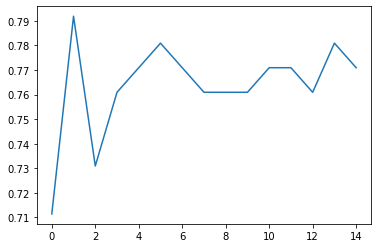

In [36]:
plt.plot(cv_score)